##### Kumaraguru code for an alalysis 18 parameters

In [632]:
# Loading required python libraries
import math
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

### Loading and Extracting the loan zip file

In [633]:
# importing the zipfil elibrary required to extract and read the zip file
import zipfile as zf
filename= 'loan.zip'
loan = zf.ZipFile(filename,'r')
# extracting the files using 'extracall' method
print(loan.printdir()) 
loan.extractall()

File Name                                             Modified             Size
loan.csv                                       2017-05-16 14:10:10     34813575
None


In [634]:
#Creating the dataframe by using the csv file present in the zip file
df = pd.read_csv(loan.open('loan.csv'),low_memory=False, parse_dates=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [635]:
#Checking the shape of the dataframe
df.shape

(39717, 111)

In [636]:
# We observed that there are more then 100 columns present in our dataframe
#Lets use set_option to display all the columns of df
pd.set_option('display.max_columns', 200)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [637]:
# Checking the detailed of the data frame to know null/or empty values
df.info(max_cols=111, memory_usage='deep',null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

In [638]:
# Lets drop the columns of the df having all null values
thresh = len(df) * .5
df.dropna(thresh = thresh, axis = 1, inplace = True)
print(df.shape)
df.head()

(39717, 54)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [639]:
# Checking the null values of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [640]:
# Lets reset the row index from default to id
df.set_index(['id'],inplace=True)
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [641]:
# Lets drop the irrelevent columns to get proper and structured data frame for analysis
# I am dropping the columns because the values of the column or either "0" or same
df.drop(['pymnt_plan','url','desc','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], inplace=True, axis=1)
print(df.shape)

(39717, 42)


### Standardization and data formating of columns

In [642]:
# Lets replace special character and convert interest rate to float
df.int_rate = df.int_rate.apply(lambda x: x.replace("%", ""))
df['int_rate']=df['int_rate'].astype(float) 

df.revol_util = df.int_rate.astype(str) 
df.revol_util = df.revol_util.apply(lambda x: x.replace("%", ""))
df.revol_util = df.revol_util.astype(float).apply(round)

df.int_rate = df.int_rate.astype(float)
df['int_rate_round'] = df.int_rate.round()

df['Loan_Month'] = df.issue_d.str.split('-').str[0].str.upper()

df['emp_length'] = df.emp_length.fillna(df.emp_length.mode()[0])


#Convert to lower case
df['loan_status'] = df['loan_status'].apply(str.lower)
df['verification_status'] = df['verification_status'].apply(str.lower)
df['purpose'] = df['purpose'].apply(str.lower)
df['title'] = df['title'].astype(str).apply(str.lower)

getTerm = lambda x: x.strip().split(' ')[0]
df['term'] = df['term'].apply(getTerm)

getYear = lambda x : datetime.strptime(x, '%b-%y').date().year

def getCRYear(x):
    y = datetime.strptime(x, '%b-%y').date().year
    if y > 2019:
        y = y - 100
    return y

df['earliest_cr_line'] = df['earliest_cr_line'].apply(getCRYear)
df['year_issued'] = df['issue_d'].apply(getYear)
df['credit_history'] = df['year_issued'] - df['earliest_cr_line']

def yearsAtWork(y):
    if y == None:
        return "invalid"
    result = re.findall("\d+", y)
    if result == None:
        return "invalid"
    return result[0]

df['emp_length'] = df['emp_length'].apply(yearsAtWork)


#EMI as a percent of monthly income
df['emi_income_percent'] = (df['installment'] / (df['annual_inc'] /12)) * 100

# Lets check the details of addr_state
print(df.addr_state.unique())

#df.head()

paidOff = df['loan_status'] == 'fully paid'
current = df['loan_status'] == 'current'
chargedOff = df['loan_status'] == 'charged off'

dfPaidOff = df.loc[paidOff]
dfCurrent = df.loc[current]
dfChargedOff = df.loc[chargedOff]

print (dfPaidOff['loan_status'].size)
print (dfCurrent['loan_status'].size)
print (dfChargedOff['loan_status'].size)

df.describe()

['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']
32950
1140
5627


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,int_rate_round,year_issued,credit_history,emi_income_percent
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,1996.560994,0.869200,9.294408,0.055065,13382.528086,12.011229,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260,12.011229,2010.328902,13.767908,6.580104
std,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,6.827175,1.070219,4.400282,0.237200,15885.016641,3.717187,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324,3.717187,0.877514,6.842892,3.998421
min,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,1946.000000,0.000000,2.000000,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,3.000000,0.028895
25%,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,1993.000000,0.000000,6.000000,0.000000,3703.000000,9.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000,9.000000,2010.000000,9.000000,3.524810
50%,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1998.000000,1.000000,9.000000,0.000000,8850.000000,12.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000,12.000000,2011.000000,13.000000,5.800500
75%,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,2001.000000,1.000000,12.000000,0.000000,17058.000000,15.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000,15.000000,2011.000000,17.000000,8.840533
max,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,2008.000000,8.000000,44.000000,4.000000,149588.000000,25.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,25.000000,2011.000000,65.000000,32.026200


In [643]:
# Lets check the status of the loans given by Lending club
df["loan_status"].value_counts()

fully paid     32950
charged off     5627
current         1140
Name: loan_status, dtype: int64

#### Analysis of the different loan and consumer attributes

In [644]:
cols = df.columns
for col in cols:
    print(col)

member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
last_credit_pull_d
pub_rec_bankruptcies
int_rate_round
Loan_Month
year_issued
credit_history
emi_income_percent


In [645]:
def printHistogram(desc, series):
    print(desc.upper())
    print(series.describe())
    plt.hist(series)
    plt.show()
    return

##### 1) Terms analysis - 36 months have defaulters more

CHARGED OFF
count     5627
unique       2
top         36
freq      3227
Name: term, dtype: object


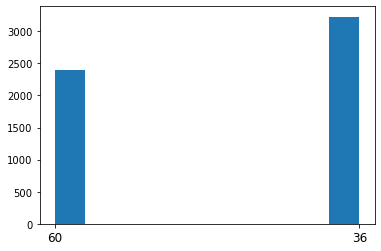

In [646]:
#Print terms - See that shorter the term, i.e., 36 months, there is a high rate of defaulters
printHistogram('charged off', dfChargedOff['term'])


##### 2) Interest rate analysis

CHARGED OFF
count    5627.000000
mean       13.797228
std         3.644524
min         5.000000
25%        11.000000
50%        14.000000
75%        16.000000
max        24.000000
Name: int_rate_round, dtype: float64


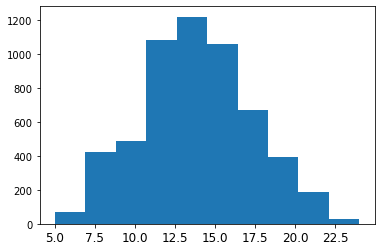

In [647]:
printHistogram('charged off', dfChargedOff['int_rate_round'])


##### 3) Term and Interest rate analysis - Observation - For those with 36 months term, about (800+650) approx 1500 of them dropped out when interest rate was 12 - 14 percent. From 60 months term, about 900 of them dropped out when interest rate was 15 - 17 percent. Observe that the defaulter count is low for 36 months as interest rate increases. So for 36 months, the interest rate has to be higher.

CHARGED OFF 36 MONTHS TERM
count    3227.000000
mean       12.374341
std         3.115656
min         5.000000
25%        10.000000
50%        13.000000
75%        15.000000
max        22.000000
Name: int_rate_round, dtype: float64


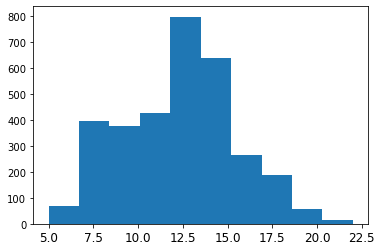

CHARGED OFF 60 MONTHS TERM
count    2400.000000
mean       15.710417
std         3.422076
min         6.000000
25%        13.000000
50%        16.000000
75%        18.000000
max        24.000000
Name: int_rate_round, dtype: float64


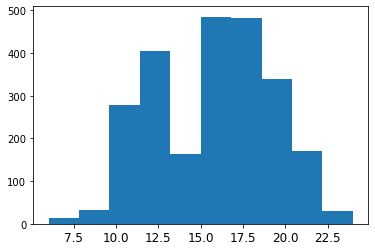

In [648]:
_36monthChargedOff = dfChargedOff[dfChargedOff['term'] == '36']
_60monthChargedOff = dfChargedOff[dfChargedOff['term'] == '60']

printHistogram('charged off 36 months term', _36monthChargedOff['int_rate_round'])
printHistogram('charged off 60 months term', _60monthChargedOff['int_rate_round'])


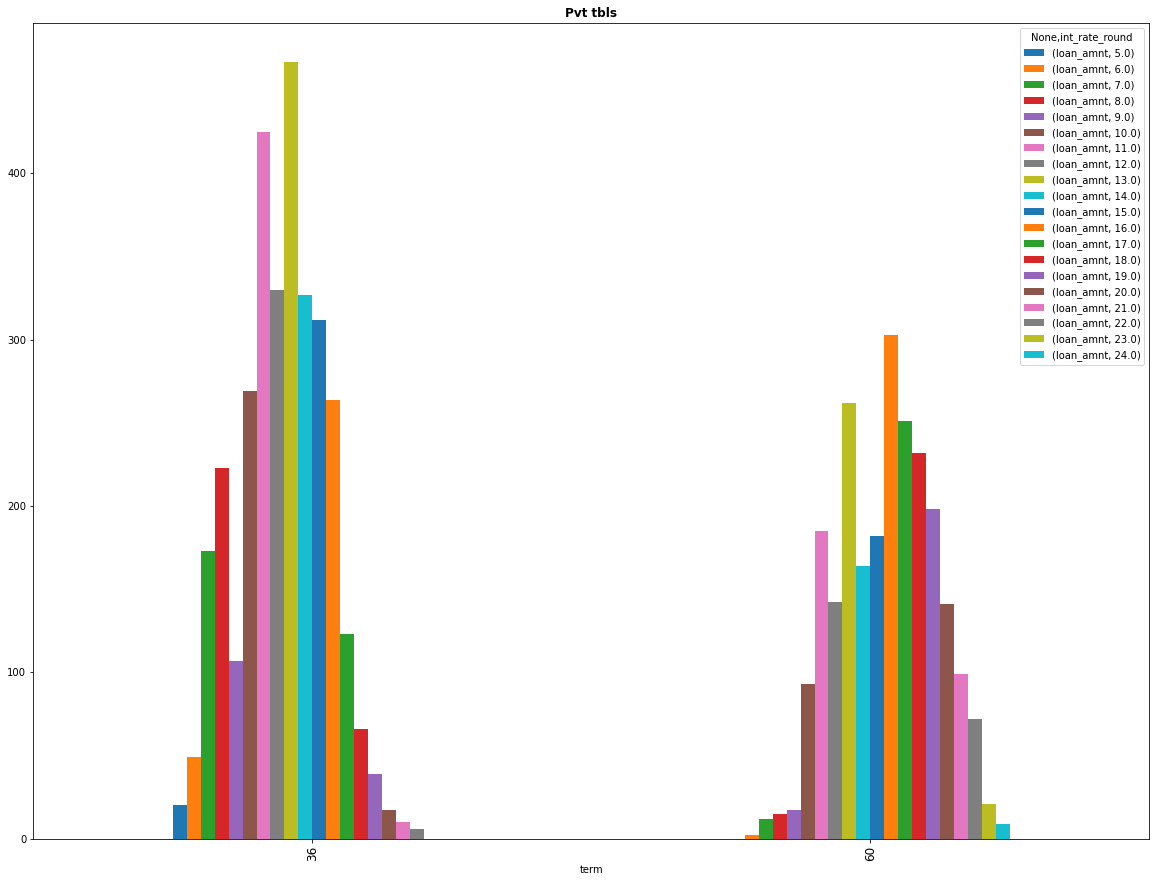

In [649]:
pt = pd.pivot_table(data=dfChargedOff, values=['loan_amnt'], index=['term'], columns = ['int_rate_round'], aggfunc='count')
pt.plot(kind="bar", figsize=[20,15])
plt.title("Pvt tbls", fontsize = 12, fontweight ='bold') 
plt.show()

##### 4) Term with credit_history (derived from earliest credit line and loan issued year). Note that the defaulters drastically reduce for both terms 36 and 60 as the credit_history (age of the person) increases. Its risky to give loans to customers with credit history between 5 to 15 years.

CHARGED OFF AGE INDICATOR
count    5627.000000
mean       13.413897
std         6.762265
min         3.000000
25%         9.000000
50%        12.000000
75%        17.000000
max        49.000000
Name: credit_history, dtype: float64


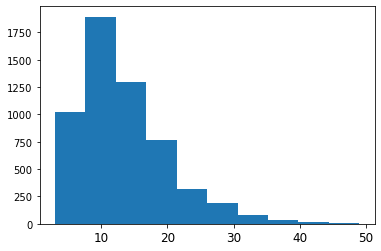

CHARGED OFF AGE INDICATOR 36 MONTHS
count    3227.000000
mean       12.718934
std         6.730073
min         3.000000
25%         8.000000
50%        12.000000
75%        16.000000
max        48.000000
Name: credit_history, dtype: float64


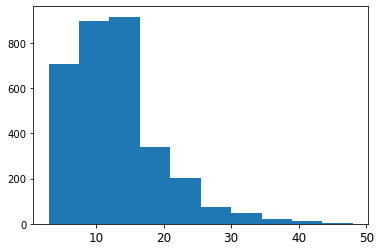

CHARGED OFF AGE INDICATOR 60 MONTHS
count    2400.000000
mean       14.348333
std         6.693890
min         3.000000
25%        10.000000
50%        13.000000
75%        18.000000
max        49.000000
Name: credit_history, dtype: float64


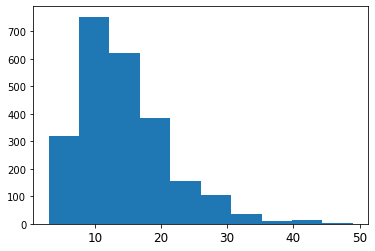

In [650]:
dfChargedOff['earliest_cr_line'].value_counts()
#dfChargedOff['year_issued'].unique()

#dfChargedOff['credit_history']
printHistogram('charged off Age Indicator', dfChargedOff['credit_history'])
printHistogram('charged off Age Indicator 36 months', _36monthChargedOff['credit_history'])
printHistogram('charged off Age Indicator 60 months', _60monthChargedOff['credit_history'])

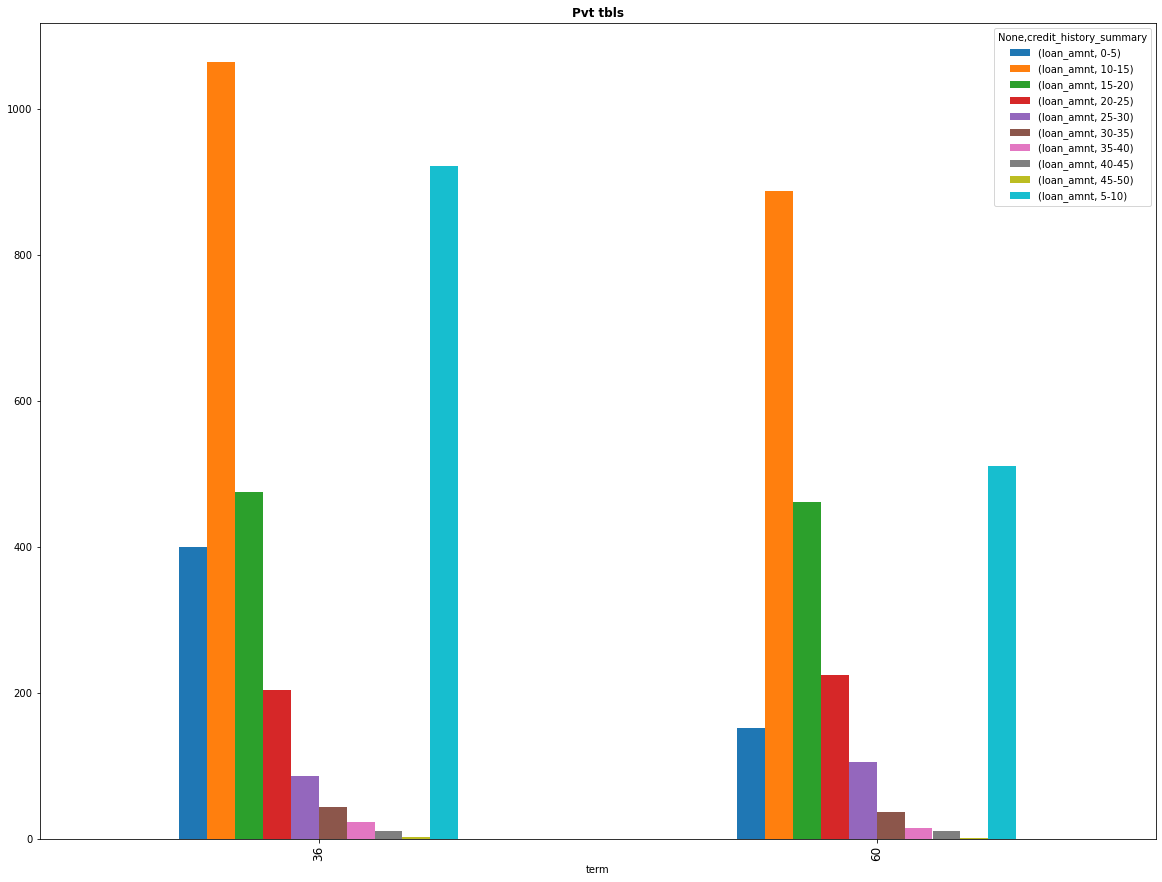

In [651]:
def grpCredHist(x):
    y = math.ceil(x / 5)
    return (str((y-1) * 5) + "-"+ str(y * 5))

dfChargedOff['credit_history_summary'] = dfChargedOff['credit_history'].apply(grpCredHist)
pt = pd.pivot_table(data=dfChargedOff, values=['loan_amnt'], index=['term'], columns=['credit_history_summary'], aggfunc='count')
pt.plot(kind="bar", figsize=[20,15])
plt.title("Pvt tbls", fontsize = 12, fontweight ='bold') 
plt.show()

 ##### 5) Analyse MONTH loan issued, PURPOSE of loan and STATE

CHARGED OFF PURPOSE LOAN GIVEN
count                   5627
unique                    14
top       debt_consolidation
freq                    2767
Name: purpose, dtype: object


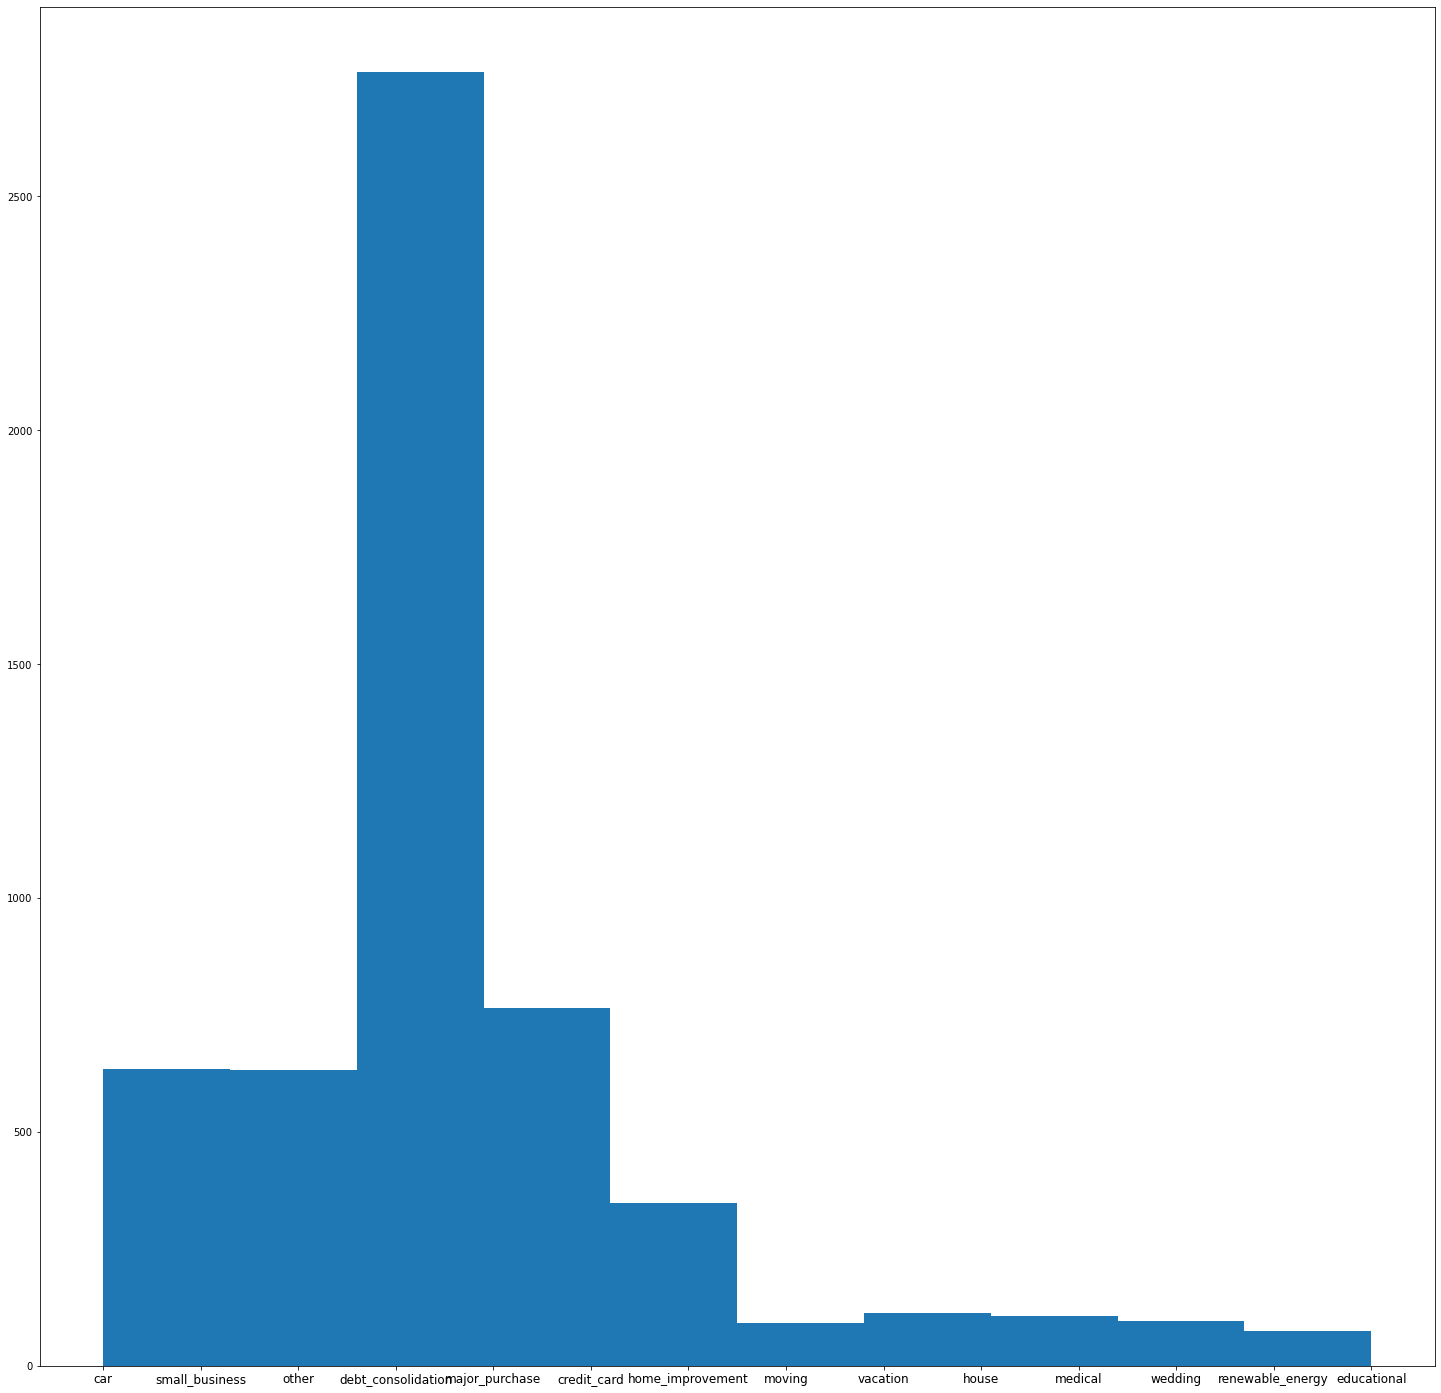

In [652]:
plt.figure(figsize=[25,25])
plt.rc('xtick', labelsize=12) 
printHistogram('charged off PURPOSE loan given', dfChargedOff['purpose'])

#plt.figure(figsize=[25,25])
#plt.rc('xtick', labelsize=12) 
#printHistogram('charged off Month loan given, 36 Month term', _36monthChargedOff['purpose'])

#plt.figure(figsize=[25,25])
#plt.rc('xtick', labelsize=12) 
#printHistogram('charged off Month loan given, 60 Month term', _60monthChargedOff['purpose'])


DEC    678
NOV    598
OCT    580
SEP    547
Name: Loan_Month, dtype: int64
CHARGED OFF MONTH LOAN GIVEN
count     5627
unique      12
top        DEC
freq       678
Name: Loan_Month, dtype: object


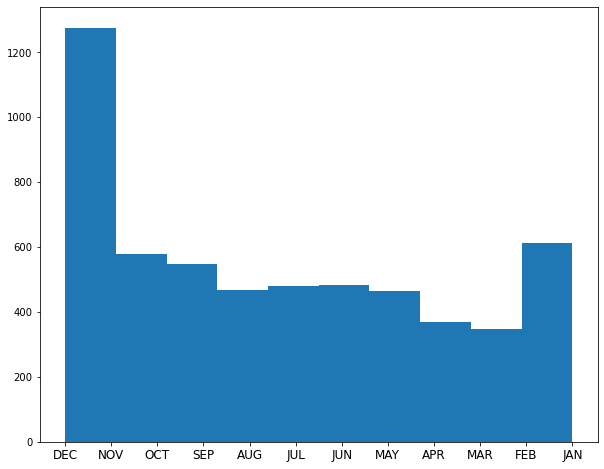

In [653]:
plt.figure(figsize=[10,8])

print(dfChargedOff['Loan_Month'].value_counts()[:4])
printHistogram('charged off MONTH LOAN GIVEN', dfChargedOff['Loan_Month'])

CHARGED OFF TOP 4 MONTHS AND PURPOSE LOAN GIVEN
count                   2403
unique                    14
top       debt_consolidation
freq                    1236
Name: purpose, dtype: object


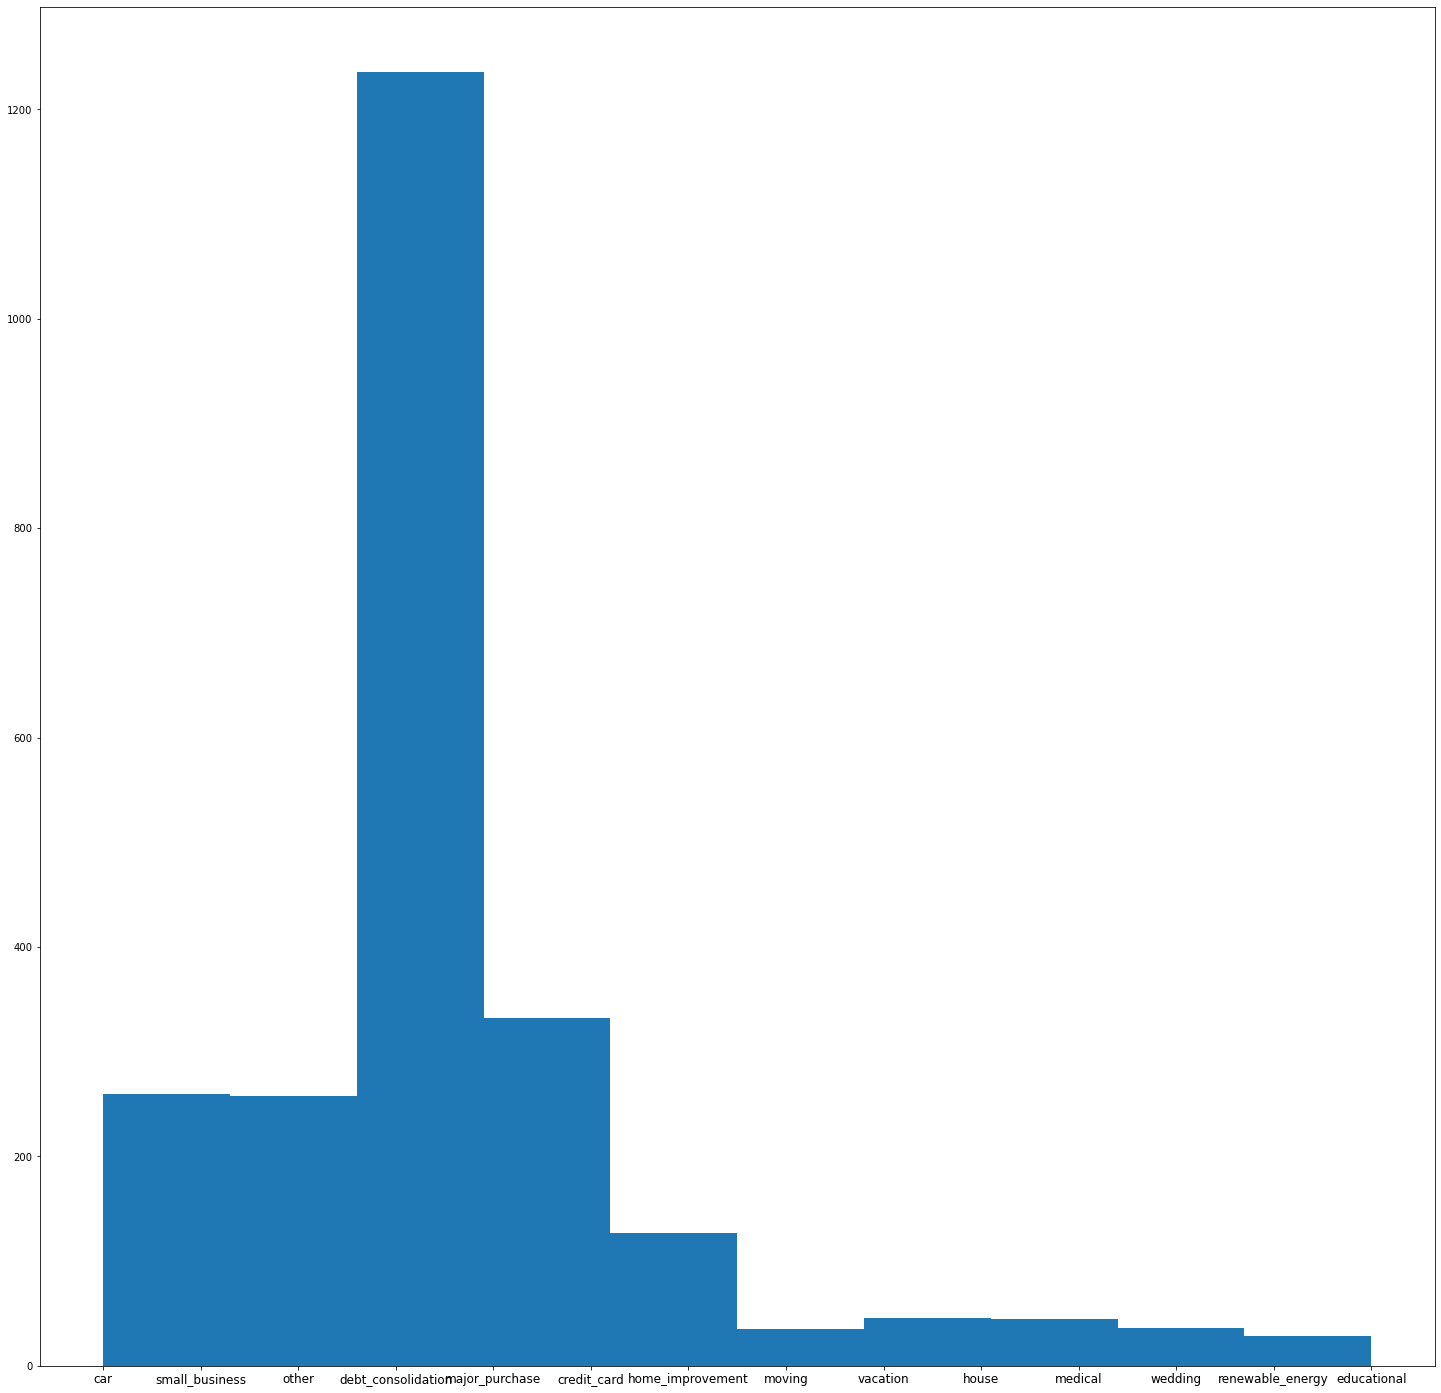

In [654]:
top4MONTHS_Filter = dfChargedOff['Loan_Month'].isin(['DEC', 'NOV', 'OCT', 'SEP'])
top4MONTHS_dfChargedOff = dfChargedOff[top4MONTHS_Filter]

plt.figure(figsize=[25,25])
plt.rc('xtick', labelsize=12) 
printHistogram('charged off TOP 4 MONTHs and PURPOSE loan given', top4MONTHS_dfChargedOff['purpose'])


In [655]:
#TOP 4 PURPOSEs for which default loans are given 
top4MONTHS_4PURPOSE_dfChargedOff = top4MONTHS_dfChargedOff['purpose'].value_counts()[:4]
top4MONTHS_4PURPOSE_dfChargedOff

debt_consolidation    1236
credit_card            262
other                  258
small_business         202
Name: purpose, dtype: int64

In [656]:
#TOP STATES WITH DEFAULTERS
dfChargedOff['addr_state'].value_counts()[:4]

CA    1125
FL     504
NY     495
TX     316
Name: addr_state, dtype: int64

##### From defaulter data, we got TOP 4 - Months, States and Purpose. We build a pivot table to categorize the purpose of loan for a month for a state. Here we can obviously see that most of defaulters take loans under the category debt consolidation, in December across all 4 states.

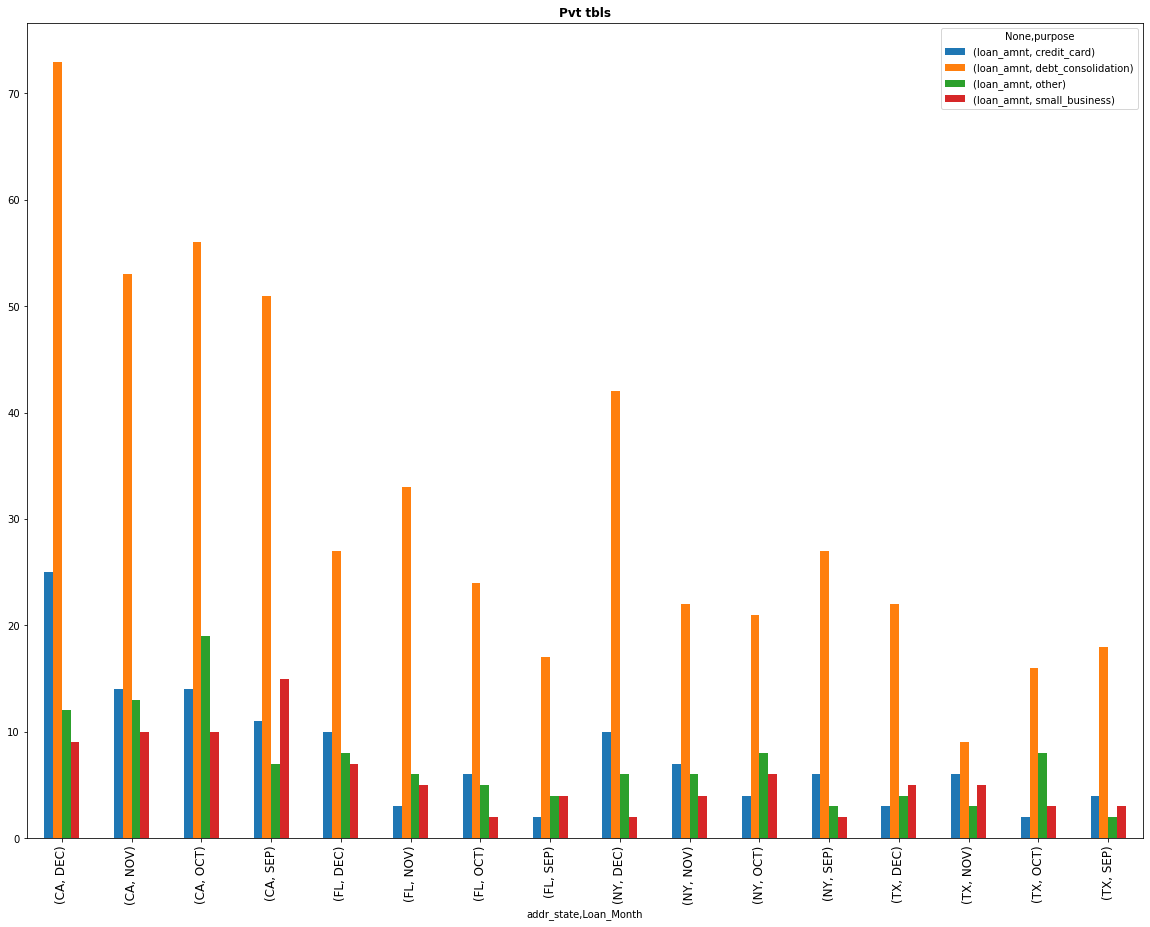

In [657]:
#STATEs histogram
#plt.figure(figsize=[25,25])
#plt.rc('xtick', labelsize=12)


top4MONTHS_Filter = dfChargedOff['Loan_Month'].isin(['DEC', 'NOV', 'OCT', 'SEP'])
top4PURPOSE_Filter = dfChargedOff['purpose'].isin(['debt_consolidation', 'credit_card', 'other', 'small_business'])
top4STATES_Filter = dfChargedOff['addr_state'].isin(['CA', 'FL', 'NY', 'TX'])

filtered_dfChargedOff = dfChargedOff[top4MONTHS_Filter & top4PURPOSE_Filter & top4STATES_Filter]

#filtered_dfChargedOff.head()

pt = pd.pivot_table(data=filtered_dfChargedOff, index=['addr_state', 'Loan_Month'], columns=['purpose'], \
                    values=['loan_amnt'], aggfunc='count')
pt.plot(kind="bar", figsize=[20,15])
plt.title("Pvt tbls", fontsize = 12, fontweight ='bold') 
plt.show()

#len(filtered_dfChargedOff[filtered_dfChargedOff['addr_state'].isin(['CA']) & filtered_dfChargedOff['Loan_Month'].isin(['DEC']) & \
#                      filtered_dfChargedOff['purpose'].isin(['credit_card'])])




##### We don't need this anymore
https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#/media/File:Census_Regions_and_Division_of_the_United_States.svg
Division 1: New England (Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont)
Division 2: Mid-Atlantic (New Jersey, New York, and Pennsylvania)
Division 3: East North Central (Illinois, Indiana, Michigan, Ohio, and Wisconsin)
Division 4: West North Central (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota)
Division 5: South Atlantic (Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, District of Columbia, and West Virginia)
Division 6: East South Central (Alabama, Kentucky, Mississippi, and Tennessee)
Division 7: West South Central (Arkansas, Louisiana, Oklahoma, and Texas)
Division 8: Mountain (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming)
Division 9: Pacific (Alaska, California, Hawaii, Oregon, and Washington)

##### 6) In November and December, in California, when a consumer takes loan under debt consolidation does credit history length have any impact. YES THIS CHART INDICATES credit history of 10 - 15 years definitely is a risk

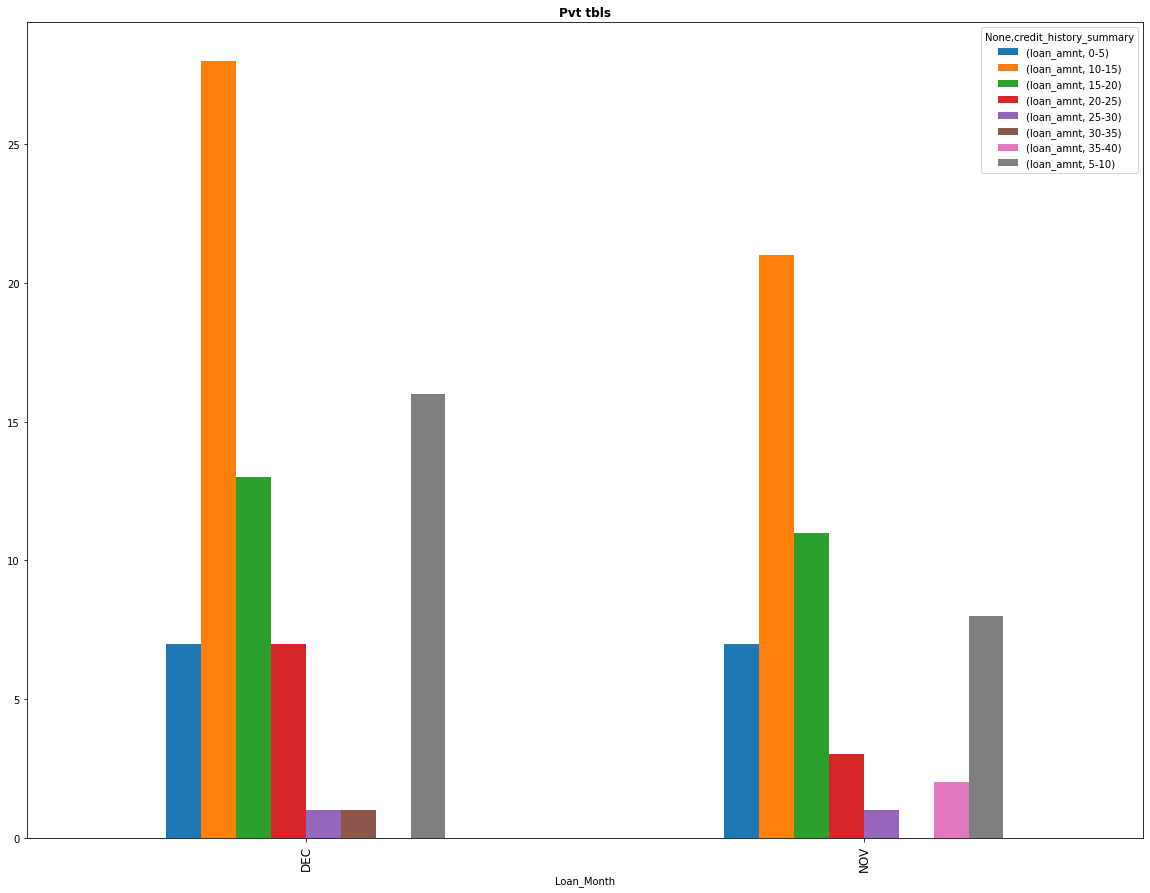

In [658]:
NOVDEC_Filter = dfChargedOff['Loan_Month'].isin(['DEC', 'NOV'])
DEBT_CONS_Filter = dfChargedOff['purpose'].isin(['debt_consolidation'])
CALIFORNIA_Filter = dfChargedOff['addr_state'].isin(['CA'])


filtered_dfChargedOff = dfChargedOff[NOVDEC_Filter & DEBT_CONS_Filter & CALIFORNIA_Filter]

#filtered_dfChargedOff.head()

pt = pd.pivot_table(data=filtered_dfChargedOff, index=['Loan_Month'], columns=['credit_history_summary'], values=['loan_amnt'], aggfunc='count')
pt.plot(kind="bar", figsize=[20,15])
plt.title("Pvt tbls", fontsize = 12, fontweight ='bold') 
plt.show()


In [659]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_round,Loan_Month,year_issued,credit_history,emi_income_percent
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,verified,Dec-11,fully paid,credit_card,computer,860xx,AZ,27.65,0,1985,1,3,0,13648,11,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,11.0,DEC,2011,26,8.143500
1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,source verified,Dec-11,charged off,car,bike,309xx,GA,1.00,0,1999,5,3,0,1687,15,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,15.0,DEC,2011,12,2.393200
1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,not verified,Dec-11,fully paid,small_business,real estate business,606xx,IL,8.72,0,2001,2,2,0,2956,16,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,16.0,DEC,2011,10,8.259549
1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,source verified,Dec-11,fully paid,other,personel,917xx,CA,20.00,0,1996,1,10,0,5598,13,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,13.0,DEC,2011,15,8.275854
1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,source verified,Dec-11,current,other,personal,972xx,OR,17.94,0,1996,0,15,0,27783,13,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,13.0,DEC,2011,15,1.016850


##### 7) Now that we know in last quater, especially December, customers take debt consolidation loan and default. Is employment history affecting their default status. YES, since 10 means greater than 10 years, we can ignore that. There is a pattern that customers with less than 1 year experience, default more and it reduces as employment length increases.
##### When a customer comes in Nov, Dec with debt consolidation as the reason and less than 1 year of employment length in current job, its risky.

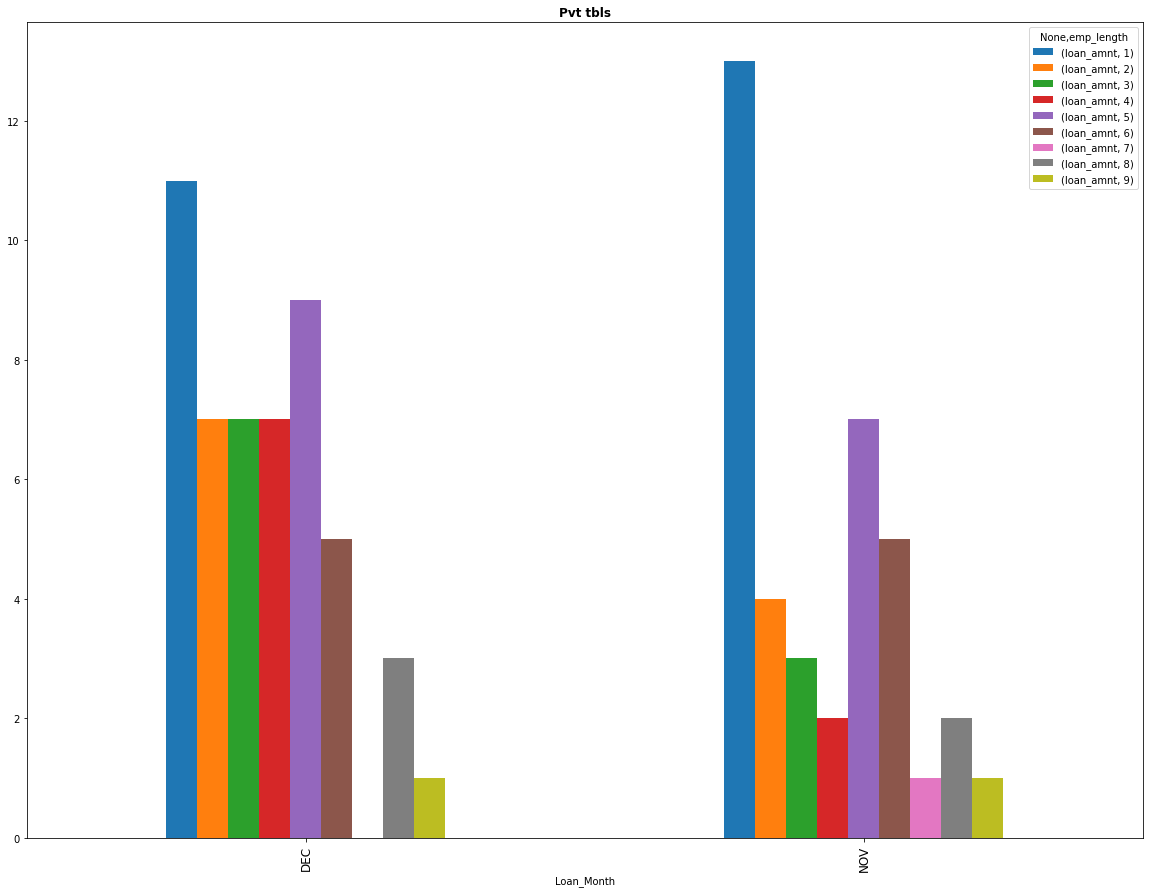

In [660]:
EMPLEN_Filter = ~dfChargedOff['emp_length'].isin(['10'])

emplen_dfChargedOff = dfChargedOff[NOVDEC_Filter & DEBT_CONS_Filter & CALIFORNIA_Filter & EMPLEN_Filter]

pt = pd.pivot_table(data=emplen_dfChargedOff, index=['Loan_Month'], columns=['emp_length'], values=['loan_amnt'], aggfunc='count')
pt.plot(kind="bar", figsize=[20,15])
plt.title("Pvt tbls", fontsize = 12, fontweight ='bold') 
plt.show()


##### 8) Now that we know in last quater, especially December, customers take debt consolidation loan and default. Does home ownership affect defaulting nature. Yes, those who rent default significantly higher than mortagers and mortgagers default higher than home owners. Hence, if a customer in rental home applies for loan with purpose debt consolidation in the months November - December, its risky.

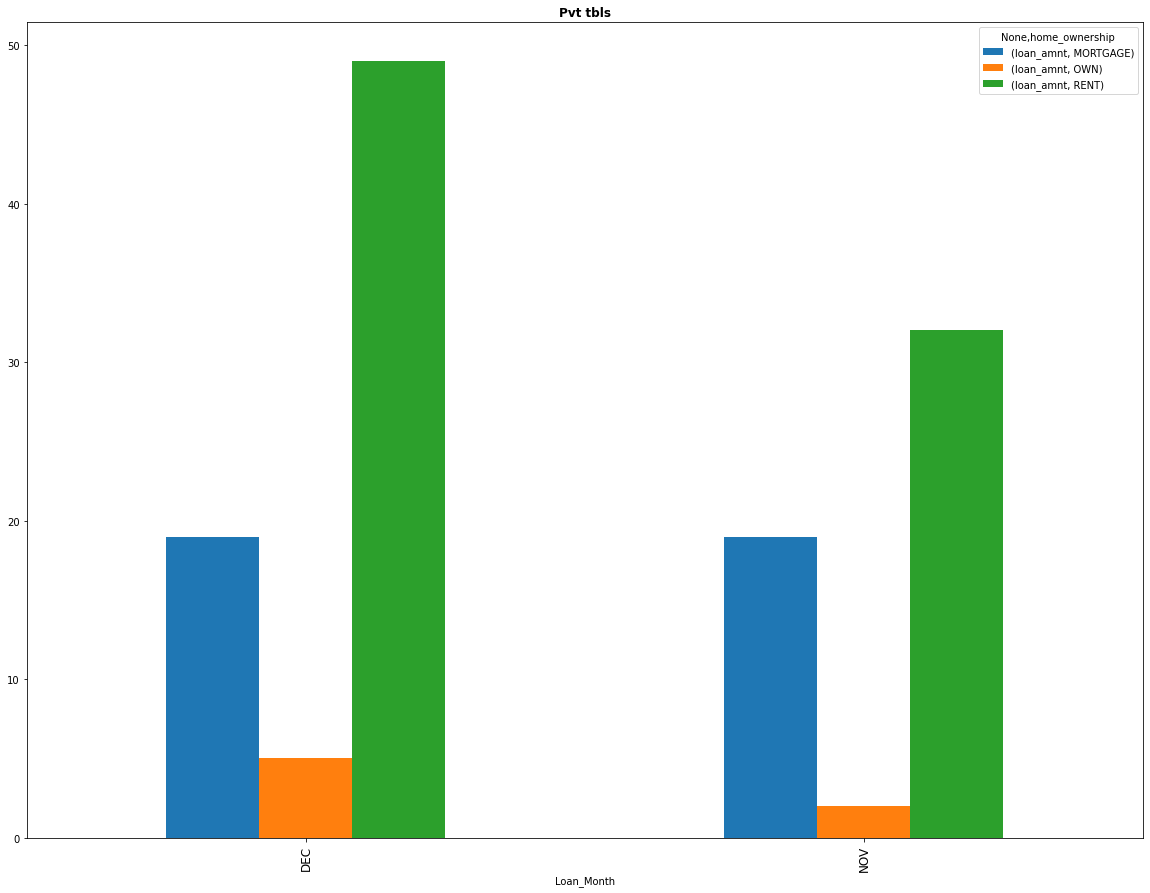

In [661]:
pt = pd.pivot_table(data=filtered_dfChargedOff, index=['Loan_Month'], columns=['home_ownership'], values=['loan_amnt'], aggfunc='count')
pt.plot(kind="bar", figsize=[20,15])
plt.title("Pvt tbls", fontsize = 12, fontweight ='bold') 
plt.show()


temp = re.findall('.*[0-9]+.*', test_string) 
#res = list(map(int, temp)) 

##### 9) Now that we know in last quater, especially December, customers take debt consolidation loan and default. How does revol_util affect the defaulting tendency. NO distinct pattern in this

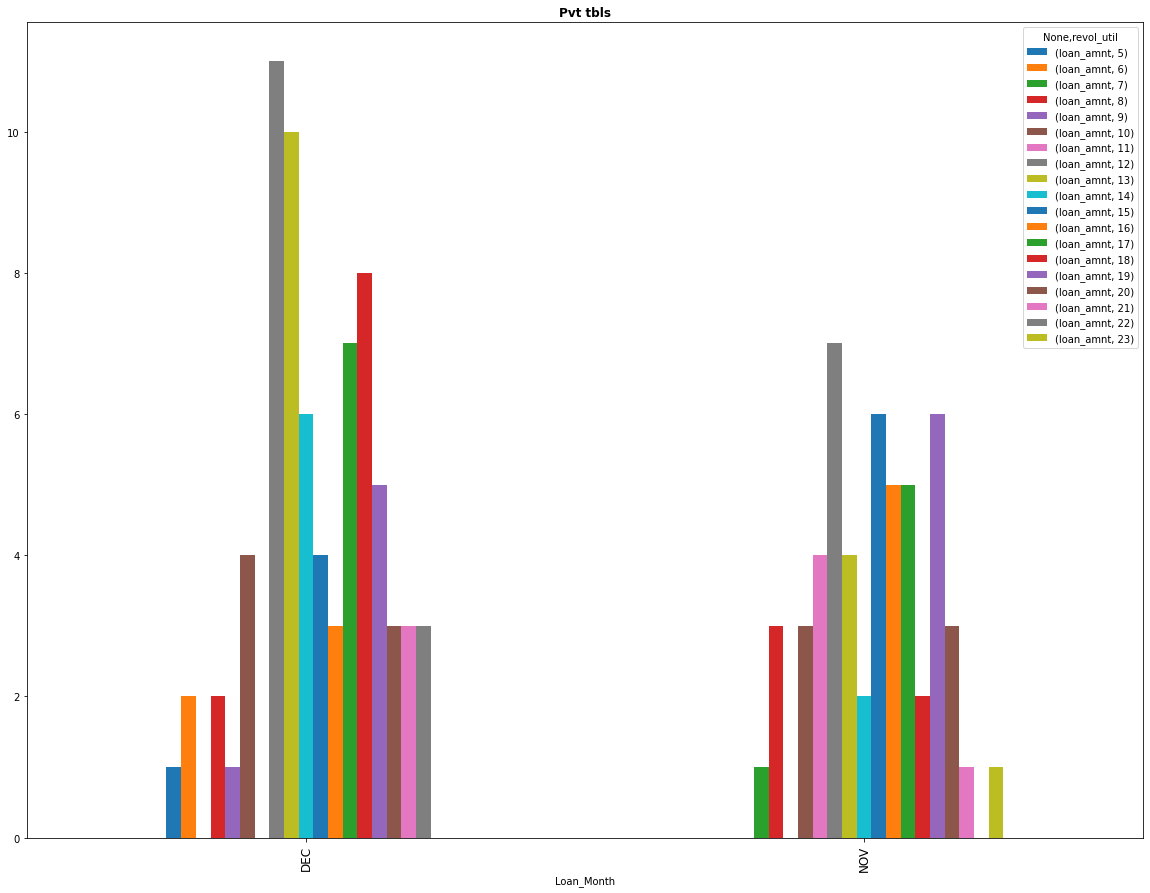

In [667]:
filtered_dfChargedOff = filtered_dfChargedOff.sort_values(by=['revol_util'])

pt = pd.pivot_table(data=filtered_dfChargedOff, index=['Loan_Month'], columns=['revol_util'], values=['loan_amnt'], aggfunc='count')
pt.plot(kind="bar", figsize=[20,15])
plt.title("Pvt tbls", fontsize = 12, fontweight ='bold') 
plt.show()



##### 10) Now that we know in last quater, especially December, customers take debt consolidation loan and default. Income verficiation has any relationship? YES - If income source verification is done, the risk is LOWER

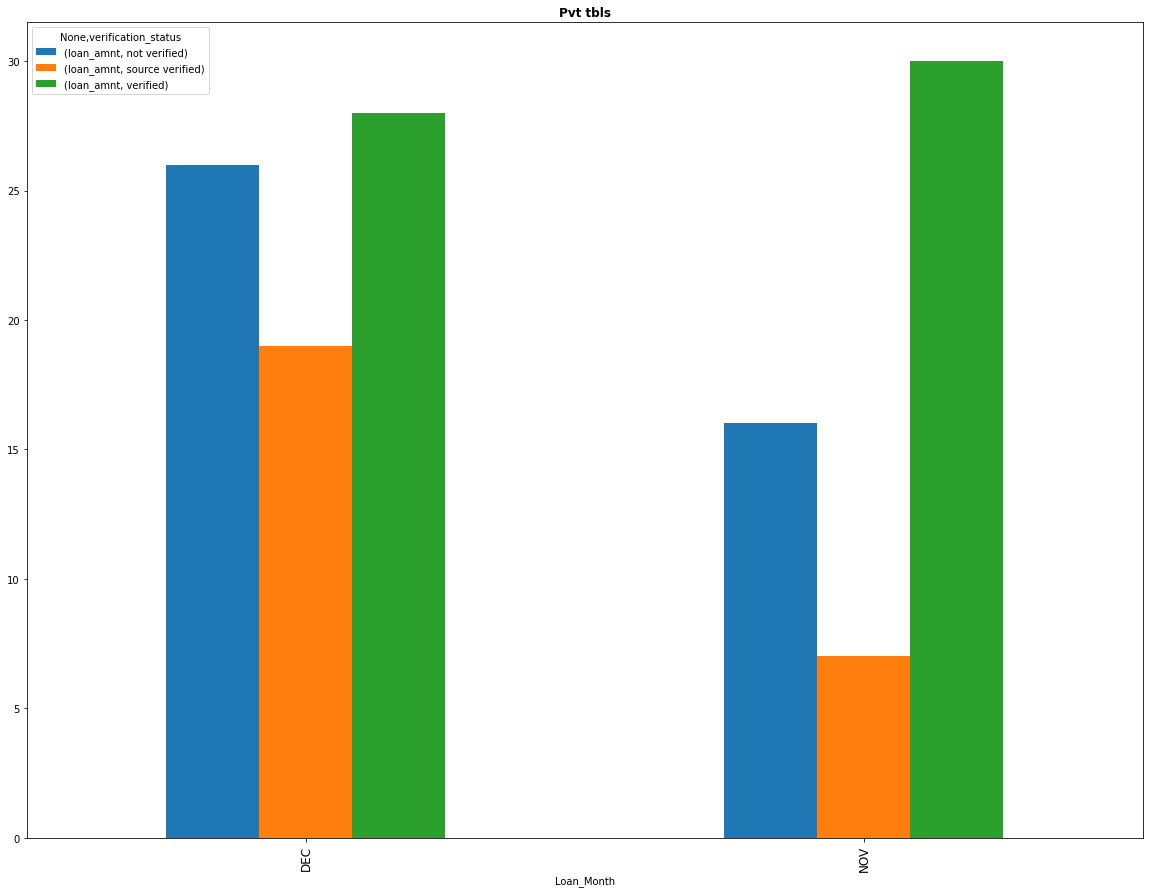

In [668]:
pt = pd.pivot_table(data=filtered_dfChargedOff, index=['Loan_Month'], columns=['verification_status'], values=['loan_amnt'], aggfunc='count')
pt.plot(kind="bar", figsize=[20,15])
plt.title("Pvt tbls", fontsize = 12, fontweight ='bold') 
plt.show()


##### 11) Now that we know in last quater, especially December, customers take debt consolidation loan and default. 
#### How many months after these customers take loan they default? 
#### How much money was recovered in total from them?

In [685]:
filtered_dfChargedOff[['funded_amnt', \
'installment', \
'total_pymnt', \
'total_rec_prncp', \
'total_rec_int', \
'total_rec_late_fee',\
'recoveries',\
'collection_recovery_fee',\
'last_pymnt_amnt',\
'last_pymnt_d'
]]

#\
#\
#'total_rec_late_fee',\
#'recoveries',\
#'collection_recovery_fee',\
#'last_pymnt_amnt',\
#'last_pymnt_d']


filtered_dfChargedOff['calc_rec'] = filtered_dfChargedOff['total_rec_prncp'] + filtered_dfChargedOff['total_rec_int'] + \
filtered_dfChargedOff['recoveries']

filtered_dfChargedOff[['funded_amnt', 'total_pymnt','calc_rec']]


,funded_amnt,total_pymnt,calc_rec
id,,,
630666,7000,3157.05,3157.05
628404,11000,5670.38,5670.38
1051710,4000,3643.22,3643.22
1025596,12000,5522.65,5522.65
1039330,8000,6374.09,6374.09
...,...,...,...
1019040,26000,4951.38,4951.38
1057201,10400,3525.35,3525.35
1038617,18825,16889.86,16889.86
